In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('../Data/train.csv')

In [134]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [135]:
df.shape

(8693, 14)

In [136]:
df['Transported'] = df['Transported'].astype(int)

In [137]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [138]:
df.dropna()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


Okay, so we'd lose over 2000 samples of our dataset by just dropping all nulls. Going to have to be a little more creative.

In [139]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int32
dtype: object

In [140]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


Those max numbers are very suspicious. Let's figure out what's going on there.

In [141]:
df['RoomService'].sort_values(ascending=False)[:40]

4416    14327.0
5105     9920.0
8626     8586.0
7933     8243.0
7118     8209.0
1177     8168.0
4762     8151.0
5725     8142.0
928      8030.0
75       7406.0
1459     7172.0
8470     6899.0
5426     6769.0
1958     6726.0
3763     6498.0
7354     6256.0
6509     6103.0
6878     5959.0
7212     5888.0
8007     5757.0
301      5715.0
2770     5711.0
338      5649.0
5182     5645.0
3984     5493.0
7980     5327.0
4807     5049.0
1467     5022.0
8123     4924.0
4978     4702.0
1703     4694.0
4757     4608.0
4561     4531.0
5518     4518.0
2310     4483.0
5753     4397.0
930      4301.0
7889     4210.0
140      4119.0
4287     4102.0
Name: RoomService, dtype: float64

<AxesSubplot:>

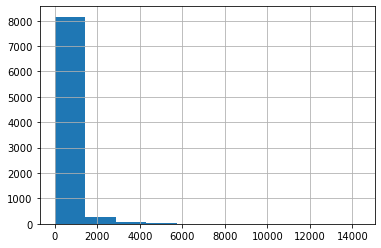

In [142]:
df['RoomService'].hist()

In [143]:
df[df['RoomService'] == df['RoomService'].max()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,0


In [144]:
df.loc[list(df['RoomService'].sort_values(ascending=False)[:5].index)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4416,4690_02,Europa,False,NaN,TRAPPIST-1e,27.0,False,14327.0,1487.0,0.0,1.0,0.0,Tope Dishocatal,0
5105,5455_01,Mars,False,E/344/P,55 Cancri e,13.0,False,9920.0,0.0,180.0,130.0,571.0,Varkes Nate,0
8626,9202_01,Europa,False,C/309/P,TRAPPIST-1e,26.0,False,8586.0,77.0,114.0,29.0,4.0,Alark Eguing,0
7933,8470_01,Europa,NaN,C/281/P,55 Cancri e,31.0,True,8243.0,280.0,0.0,3220.0,2285.0,Brafirk Aloubtled,0
7118,7585_02,Europa,False,C/281/S,TRAPPIST-1e,39.0,NaN,8209.0,18.0,432.0,3560.0,54.0,Azhasim Admingried,0


In [145]:
def inspect_numerical_variable(df_variable, top_view=40, top_detail=10):
    print('Top Spenders:')
    print(df_variable.sort_values(ascending=False)[:top_view])
    print('Spending Distribution')
    print(df_variable.hist())
    print('Top 5 Details:')
    print(df.loc[list(df_variable.sort_values(ascending=False)[:top_detail].index)])
    return None

Top Spenders:
2067    29813.0
1213    27723.0
3198    27071.0
3538    26830.0
1842    21066.0
3180    18481.0
6508    17958.0
7520    17901.0
4083    17687.0
3428    17432.0
1496    17394.0
7353    16856.0
474     16521.0
4107    16455.0
1770    16263.0
7164    16016.0
7559    15450.0
8588    14773.0
4063    14201.0
6560    14076.0
1385    13561.0
6230    13561.0
1740    13527.0
5722    13437.0
5998    13342.0
764     13248.0
2364    12809.0
832     12804.0
8487    12563.0
725     12180.0
2153    12077.0
871     12045.0
5371    11856.0
7579    11598.0
5309    11594.0
4496    11552.0
5990    11441.0
105     11418.0
4145    11417.0
7046    11396.0
Name: FoodCourt, dtype: float64
Spending Distribution
AxesSubplot(0.125,0.125;0.775x0.755)
Top 5 Details:
     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
2067     2215_01     Europa     False   A/27/S  55 Cancri e  41.0   True   
1213     1292_01     Europa     False   B/55/S  55 Cancri e  31.0   True   
3198     344

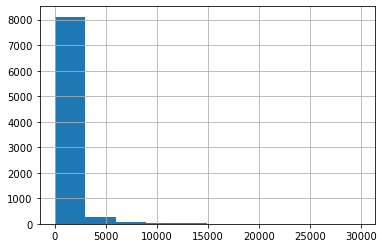

In [146]:
inspect_numerical_variable(df['FoodCourt'])

Top Spenders:
8415    23492.0
6223    12253.0
7425    10705.0
4724    10424.0
5673     9058.0
6453     7810.0
385      7185.0
8315     7148.0
637      7104.0
5137     6805.0
7950     6331.0
8078     6221.0
1043     6124.0
375      5952.0
4621     5635.0
5989     5468.0
4457     4940.0
1831     4899.0
4059     4874.0
1222     4817.0
4004     4790.0
6729     4761.0
4455     4581.0
3520     4509.0
326      4447.0
8391     4407.0
2604     4333.0
4098     4285.0
7217     4127.0
6492     4058.0
7397     3958.0
5718     3949.0
6964     3944.0
2492     3813.0
4510     3783.0
6241     3700.0
1133     3700.0
2687     3648.0
3881     3627.0
1057     3505.0
Name: ShoppingMall, dtype: float64
Spending Distribution
AxesSubplot(0.125,0.125;0.775x0.755)
Top 5 Details:
     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
8415     8989_01     Europa     False  B/291/P  TRAPPIST-1e  17.0  False   
6223     6583_01     Europa     False  B/254/S  TRAPPIST-1e  13.0  False   
7425     

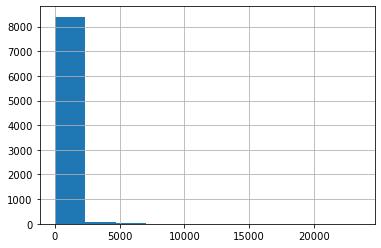

In [147]:
inspect_numerical_variable(df['ShoppingMall'])

Top Spenders:
5619    24133.0
4311    20336.0
725     17306.0
6547    17074.0
3366    16337.0
3916    14485.0
4551    12708.0
8171    12685.0
4319    12682.0
7082    12424.0
8442    12392.0
4941    12323.0
7978    12143.0
5117    12061.0
8392    11741.0
2127    11643.0
1451    11378.0
8367    11325.0
5131    11213.0
230     10912.0
983     10896.0
6049    10888.0
3653    10786.0
5857    10270.0
5258    10206.0
3796    10173.0
5000    10074.0
7995    10028.0
5954     9837.0
7948     9811.0
73       9654.0
582      9568.0
3505     9244.0
4742     9129.0
7276     9065.0
7576     9033.0
1053     9010.0
3465     8735.0
5294     8221.0
2142     8195.0
Name: VRDeck, dtype: float64
Spending Distribution
AxesSubplot(0.125,0.125;0.775x0.755)
Top 5 Details:
     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
5619     5977_02     Europa     False  B/230/S  55 Cancri e  57.0  False   
4311     4594_02     Europa     False  C/144/P  TRAPPIST-1e  31.0  False   
725      0768_0

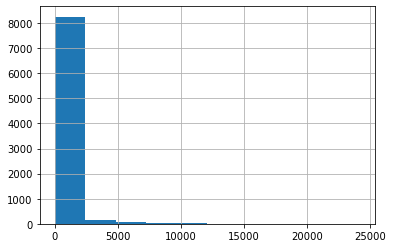

In [148]:
inspect_numerical_variable(df['VRDeck'])

In [149]:
df['FoodCourt'][df['FoodCourt'] >= df['FoodCourt'].mean()].sum()/df['FoodCourt'].sum()

0.9561252945882972

In [150]:
df['FoodCourt'][df['FoodCourt'] >= df['FoodCourt'].mean()].count()/df['FoodCourt'].count()

0.17074030552291422

Okay, so it looks like the passengers from Europa tend to be the wealthiest and the biggest spenders. A very small proportion of the passengers spend in excess of the average, but they do by large margins.

In [151]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


Let's add a total spend column

In [152]:
df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Length: 8693, dtype: float64

In [153]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [154]:
df.iloc[:, 7:12].sum(axis=1)

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Length: 8693, dtype: float64

In [155]:
df['TotalSpend'] = df.iloc[:, 7:12].sum(axis=1)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0


Let's also break out names

In [156]:
df['Name'].str.split().str.len().value_counts()

2.0    8493
Name: Name, dtype: int64

All names are first and last names

In [157]:
df['FirstName'] = df['Name'].str.split().str[0]
df['LastName'] = df['Name'].str.split().str[1]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,Willy,Santantines


Let's break out the components of the cabin labels, as well

In [158]:
df['Cabin'].str.split('/')

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
8688      [A, 98, P]
8689    [G, 1499, S]
8690    [G, 1500, S]
8691     [E, 608, S]
8692     [E, 608, S]
Name: Cabin, Length: 8693, dtype: object

In [159]:
df['CabinSector'] = df['Cabin'].str.split('/').str[0]
df['CabinRoom'] = df['Cabin'].str.split('/').str[1]
df['CabinClass'] = df['Cabin'].str.split('/').str[2]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,Juanna,Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,Altark,Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,Solam,Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,Willy,Santantines,F,1,S


Looks like that about does it as far as breaking down columns. Let's looks at some of the qualities of these columns, now.

In [160]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,FirstName,LastName,CabinSector,CabinRoom,CabinClass
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693.000000,8693.000000,8493,8493,8494,8494,8494
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,NaN,NaN,2706,2217,8,1817,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,NaN,NaN,Idace,Casonston,F,82,S
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,13,18,2794,28,4288
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,0.503624,1440.866329,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,0.500016,2803.045694,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,716.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,1.000000,1441.000000,NaN,NaN,NaN,NaN,NaN


In [161]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [162]:
df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [163]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [164]:
df['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [165]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [166]:
df['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

Okay, let's produce a simple dataset that has no interpolation/imputation for nulls, just to get a baseline.

In [167]:
df_nulldrop = df.dropna()
df_nulldrop.shape

(6606, 20)

In [168]:
df_nulldrop.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpend,FirstName,LastName,CabinSector,CabinRoom,CabinClass
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,Juanna,Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,Altark,Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,Solam,Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,Willy,Santantines,F,1,S


In [170]:
df_nulldrop.to_csv('../Data/input_nulldrop.csv', index=False)